# ML project [Edgar Barreira]

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.


The idea for this project is a pedagogical one: try to explore as many techniques as you can. I understand you have jobs and families and things to do, so I will focus more on the rigor rather than the quantity. 

## Minimum requirements:

1. Explore the data statistics as you have learned in our and previous modules.
2. Validation techniques: train/validation/test split is the minimum and most common one, but feel free to explore others.
3. Choose a classification model and train it.
4. Check the metrics.


## Optional things to learn more (ask me if you had any questions):

1. Outlier detection
2. Feature selection and dimensionality reduction techniques
3. Imbalanced dataset techniques
4. Hyperparameter tunning
5. Statistical tests

### NOTE: it is important to comment with text *every step* to show that you understand what you are doing

In [45]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Import the Customer-Churn-Records.csv file and HAVE FUN
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
# Characterization of the dataframe - Head
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [4]:
# Characterization of the dataframe - Describe
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

C:\Users\edgar.barreira\AppData\Local\Temp\ipykernel_37360\205706816.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


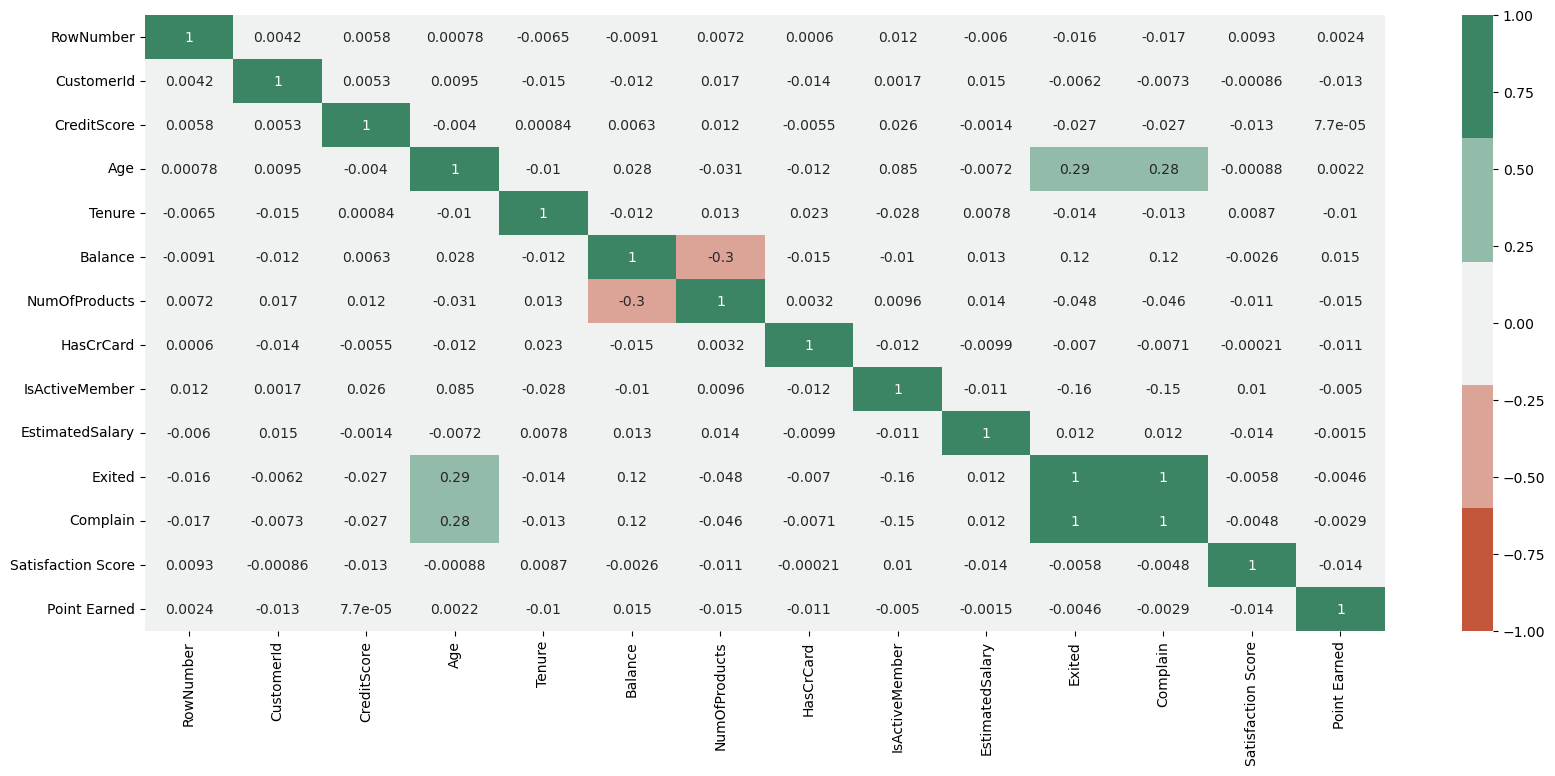

In [5]:
# Create heatmap with correlation
plt.figure(figsize = (20,8))
#sns.heatmap(correlation, cmap = 'coolwarm')
sns.heatmap(df.corr(),
            vmin = -1,
            vmax = 1,
            cmap=sns.diverging_palette(20, 150, n=5),
            annot=True)
plt.show()

In [6]:
#Validation of nulls
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

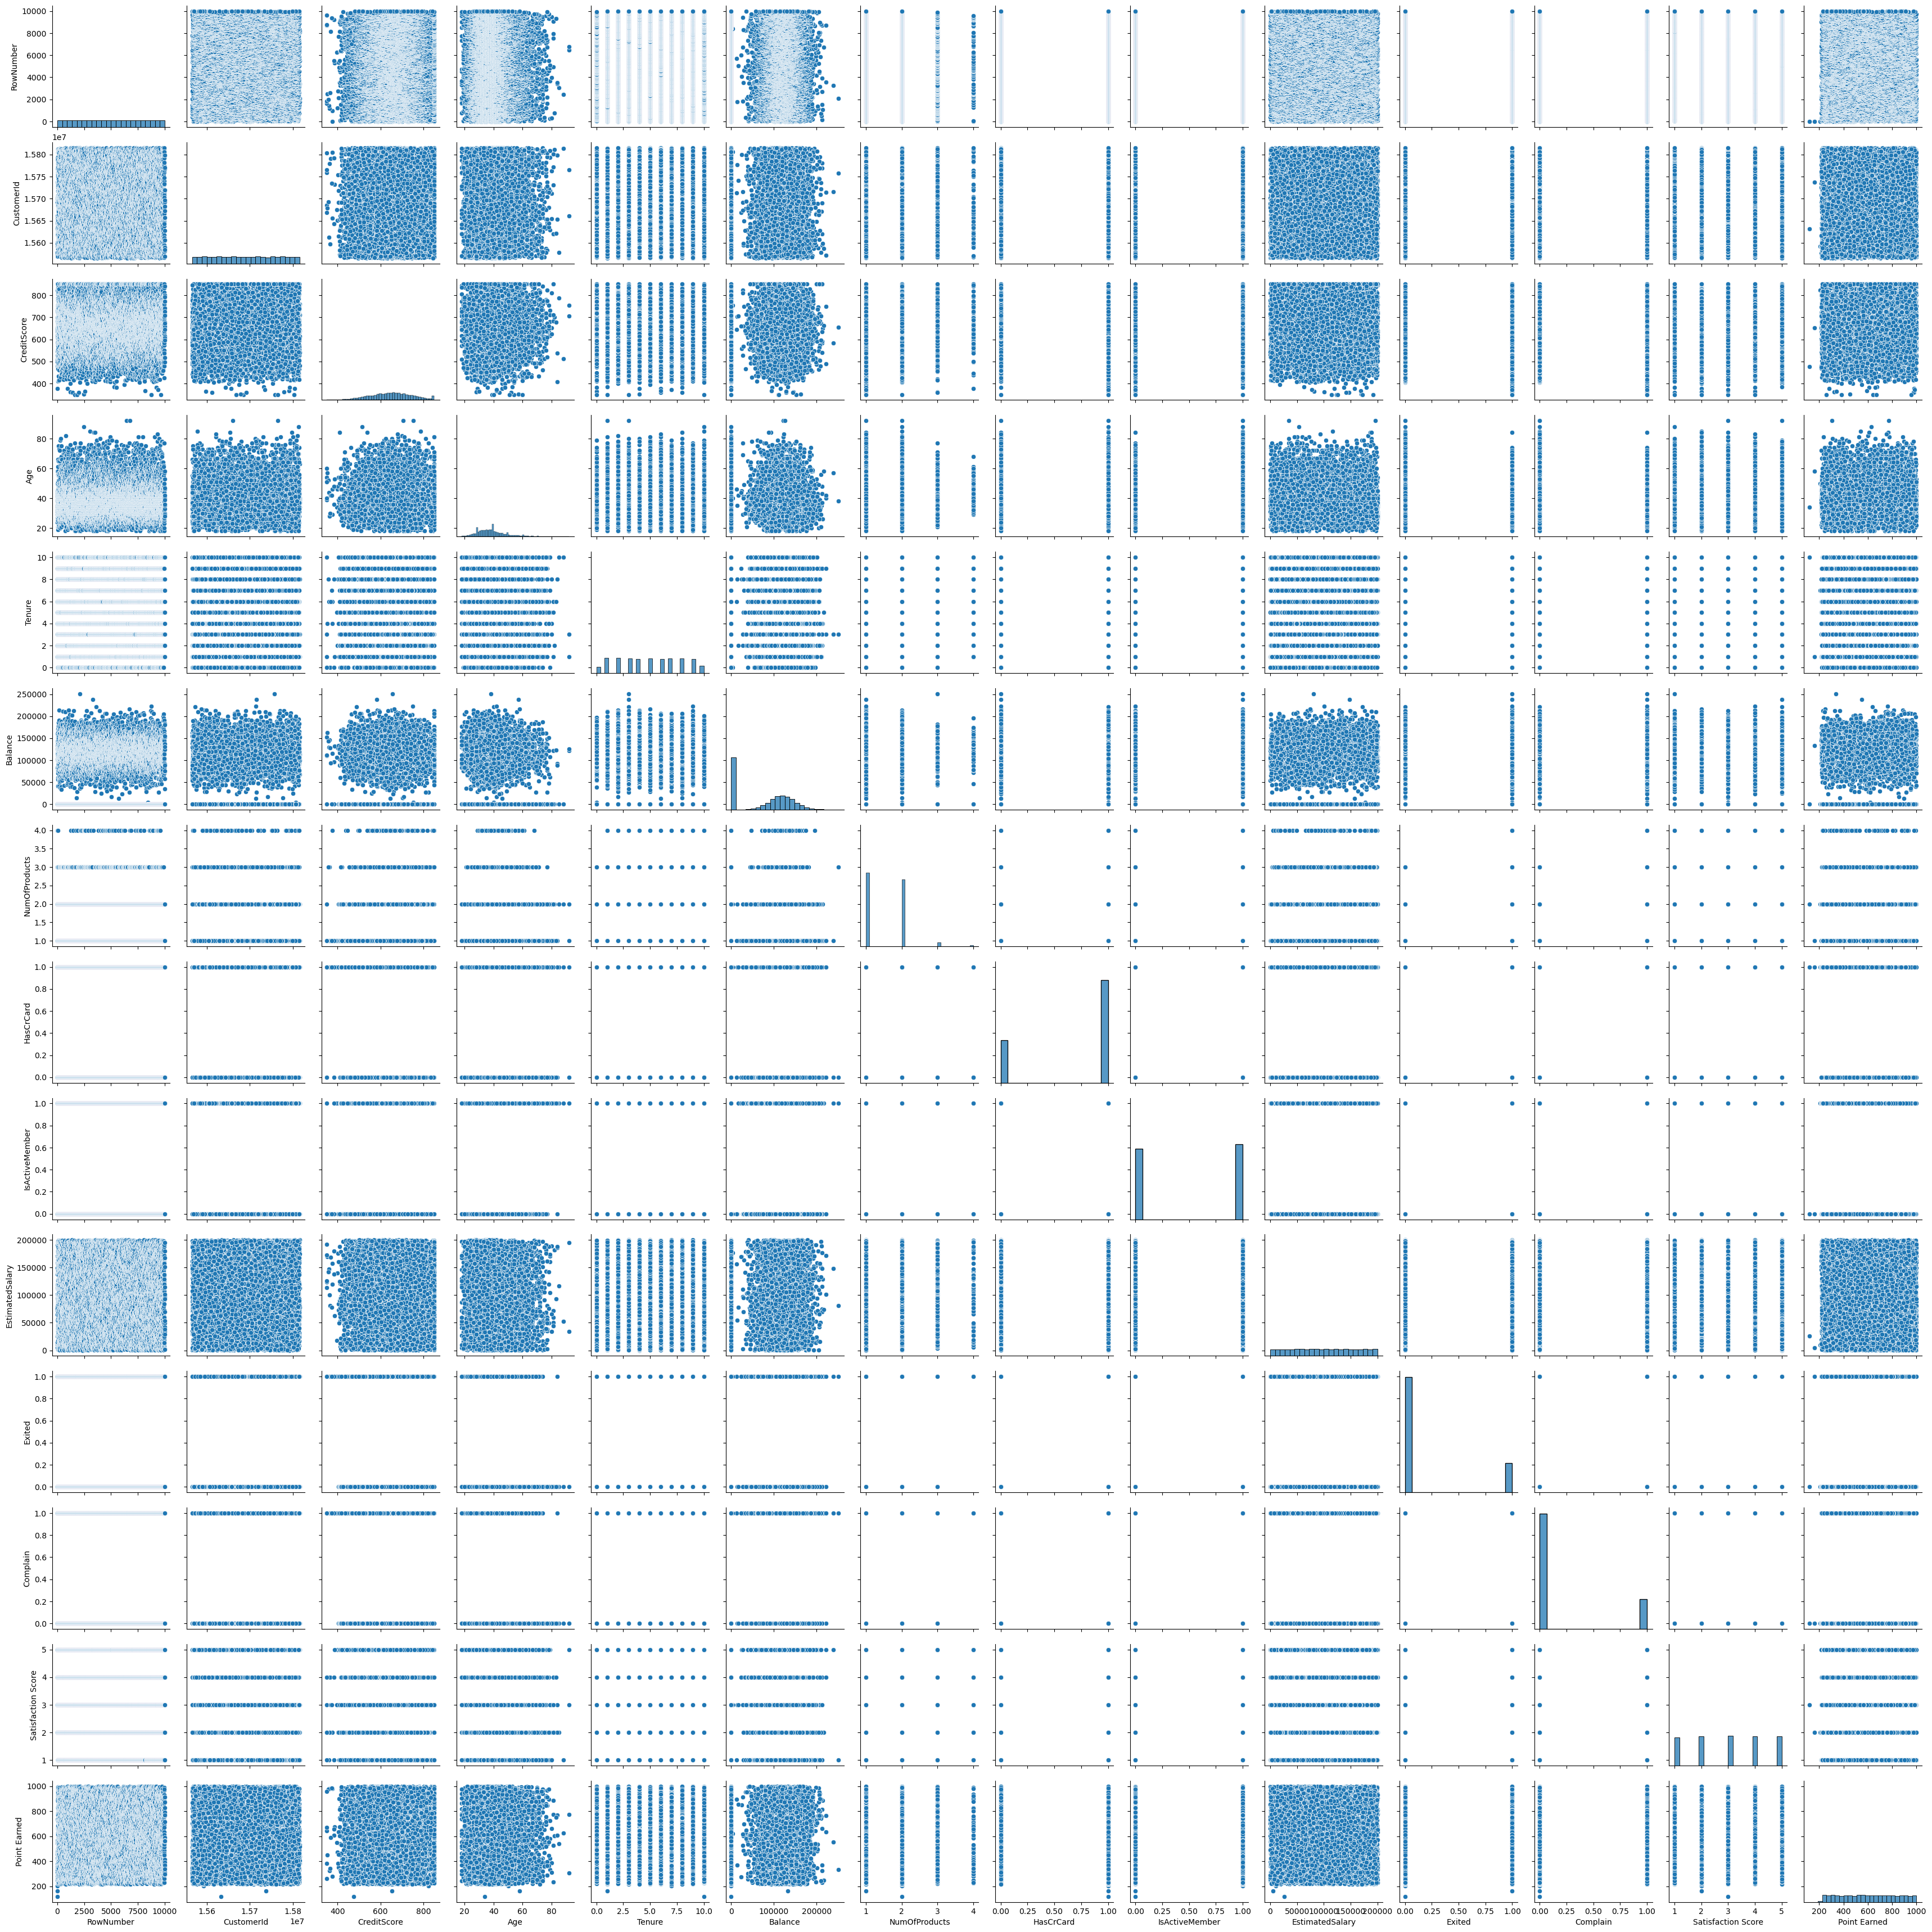

In [100]:
# Plot correlation (by values) - just run again if you need (it's heavy!)
#sns.pairplot(df)

### Looking the heatmap we have positive correlation ("Exited" with "Complain") and negative correlation ("NumOfProducts" with "Balance"). At the same time seems "Age" and "Balance" are also a sub-factor for the "Exited" and "Complain". Let's analyze!

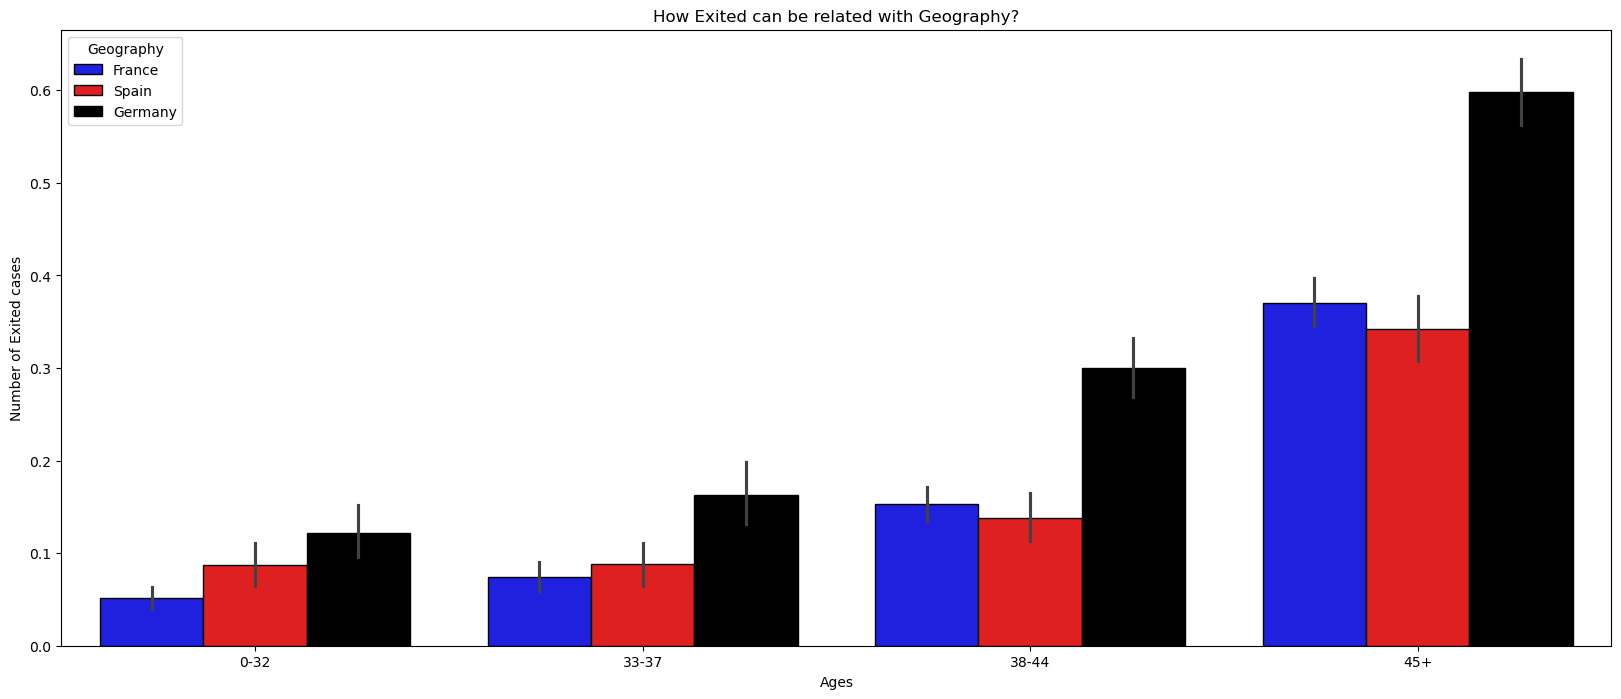

In [99]:
# Correlation analysis ("Exited", "Age", "Geography")
bins=[0,32,37,44,100]
labels=['0-32', '33-37','38-44','45+']

# Age groups (instead of Age, base in the quarters intervals)
df['age_group']=pd.cut(df['Age'],bins=bins, labels=labels, right=False)

# Palette colors (for graph)
colors = {'Spain':'red', 'France':'blue','Germany':'black' }

# Graph time
plt.figure(figsize = (20,8))
ax=sns.barplot(data=df,x='age_group',y='Exited',hue='Geography', palette=colors, estimator='mean', edgecolor='black')
plt.xlabel('Ages')
plt.ylabel('Number of Exited cases')
plt.title('How Exited can be related with Geography?', loc='center')


plt.show()

In [8]:
#subset of the main dataframe to inspect just the Exited customers
df_exited = df[df['Exited']==1]

In [9]:
df_exited.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  2038.000000  2.038000e+03  2038.000000  2038.000000  2038.000000   
mean   4908.406771  1.569006e+07   645.414622    44.835623     4.934740   
std    2868.353597  7.267539e+04   100.337351     9.759754     2.936768   
min       1.000000  1.556571e+07   350.000000    18.000000     0.000000   
25%    2421.250000  1.562744e+07   578.000000    38.000000     2.000000   
50%    4875.500000  1.568902e+07   646.000000    45.000000     5.000000   
75%    7419.750000  1.575302e+07   716.000000    51.000000     8.000000   
max    9999.000000  1.581566e+07   850.000000    84.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    2038.000000    2038.000000  2038.000000     2038.000000   
mean    91109.476006       1.475466     0.699215        0.360648   
std     58346.483197       0.801408     0.458712        0.480306   
min         0.000000       1.000000     0.000000        0.000000   
25%     38591.222500       1.000000     0.000000        0.000000   
50%    109344.230000       1.000000     1.000000        0.000000   
75%    131423.637500       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary  Exited     Complain  Satisfaction Score  Point Earned  
count      2038.000000  2038.0  2038.000000         2038.000000   2038.000000  
mean     101509.908783     1.0     0.998037            2.997547    604.448479  
std       57932.623392     0.0     0.044270            1.399381    225.315301  
min          11.580000     1.0     0.000000            1.000000    163.000000  
25%       51924.020000     1.0     1.000000            2.000000    405.000000  
50%      102489.335000     1.0     1.000000            3.000000    610.500000  
75%      152443.857500     1.0     1.000000            4.000000    793.000000  
max      199808.100000     1.0     1.000000            5.000000   1000.000000

Text(0.5, 1.0, 'How different is the balance of the Exited and non-Exited customers?')

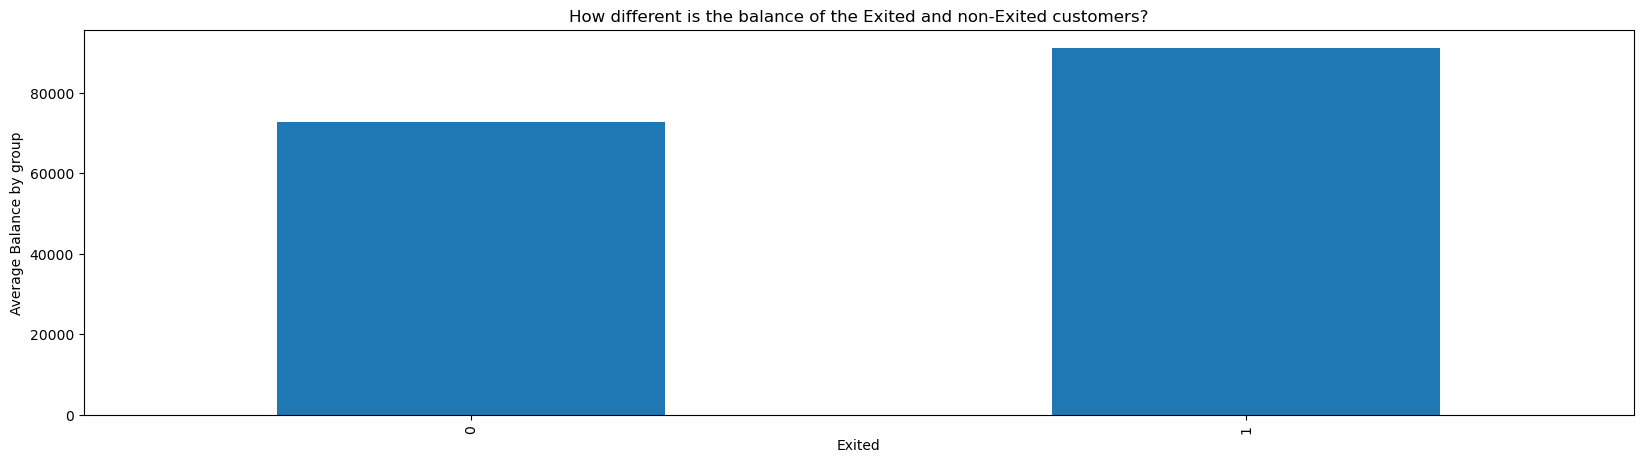

In [10]:
# How different is the balance of the Exited and non-Exited customers?
df_tmp = df.groupby(['Exited'])["Balance"].mean().plot(kind='bar',figsize=(20,5))#, colors=['red','green'])

plt.ylabel('Average Balance by group')
plt.title('How different is the balance of the Exited and non-Exited customers?', loc='center')

Text(0.5, 1.0, 'How different is the Age of the Exited and non-Exited customers?')

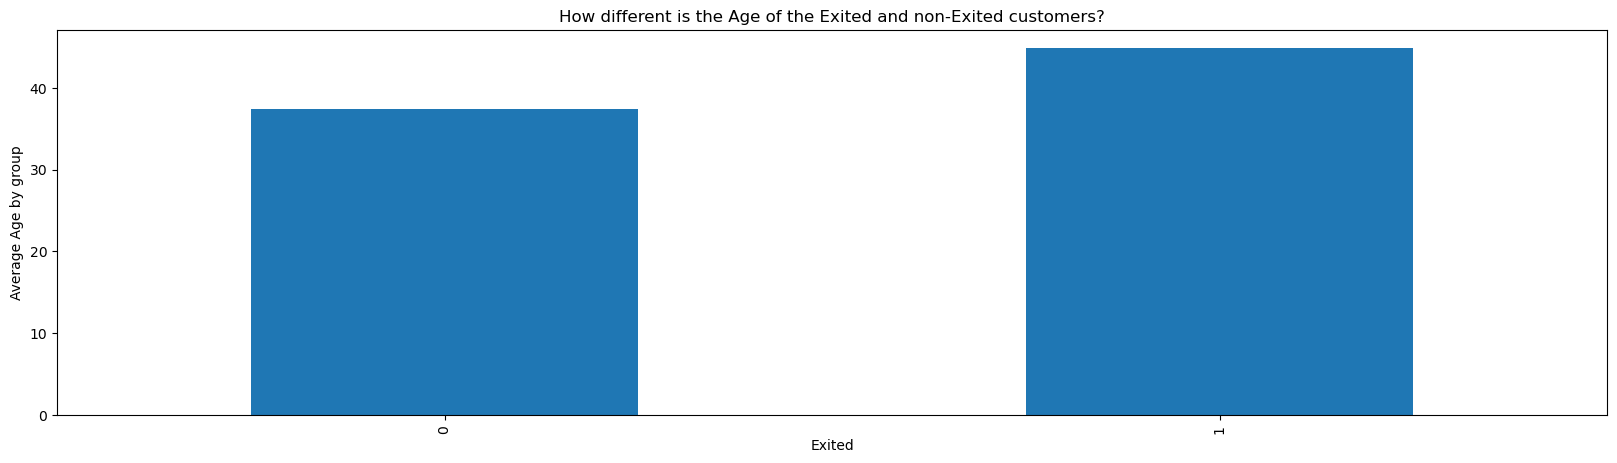

In [11]:
# How different is the Ages of the Exited and non-Exited customers?
df_tmp = df.groupby(['Exited'])["Age"].mean().plot(kind='bar',figsize=(20,5))#, colors=['red','green'])

plt.ylabel('Average Age by group')
plt.title('How different is the Age of the Exited and non-Exited customers?', loc='center')

In [12]:
# Now let's check relevant outliers in Balance. Why? 
# Considering the outliers in Balance as the more relevant customers, we need to have a fine profile these customers
q1, q3 = np.percentile(df['Balance'], [25, 75])
iqr = q3 - q1
print("IQR is",iqr)

lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print("Dataset without outliers is between",lb,"and", ub)
df['Balance_outlier'] = (df['Balance'] < lb) | (df['Balance'] > ub)

#How many outliers we have in dataframe?
Balance_outlier_true = (df["Balance_outlier"]==True).sum()
print ("Number of outliers is", Balance_outlier_true)

IQR is 127644.24
Dataset without outliers is between -191466.36000000002 and 319110.60000000003
Number of outliers is 0


In [13]:
# So if we don't have outliers we'll try to analyse the top customers in terms of Balance (q1 Vs q3)
df_Balanceq1 = df[df['Balance']<=q1]
df_Balanceq3 = df[df['Balance']>q3]

In [14]:
# Exited Proportions by Gender (using Q1 and Q3 Balance threshoulds)
Balance_by_Gender_q1=df_Balanceq1.groupby(['Gender'])["Exited"].count()/len(df_Balanceq1)
Balance_by_Gender_q3=df_Balanceq3.groupby(['Gender'])["Exited"].count()/len(df_Balanceq3)

# Exited Proportions by Age (Q1 and Q3 threshoulds)
Balance_by_Age_q1=df_Balanceq1.groupby(['age_group'])["Exited"].count()/len(df_Balanceq1)
Balance_by_Age_q3=df_Balanceq3.groupby(['age_group'])["Exited"].count()/len(df_Balanceq3)

# Exited Proportions by Complain (Q1 and Q3 threshoulds)
Balance_by_Complain_q1=df_Balanceq1.groupby(['Complain'])["Exited"].count()/len(df_Balanceq1)
Balance_by_Complain_q3=df_Balanceq3.groupby(['Complain'])["Exited"].count()/len(df_Balanceq3)

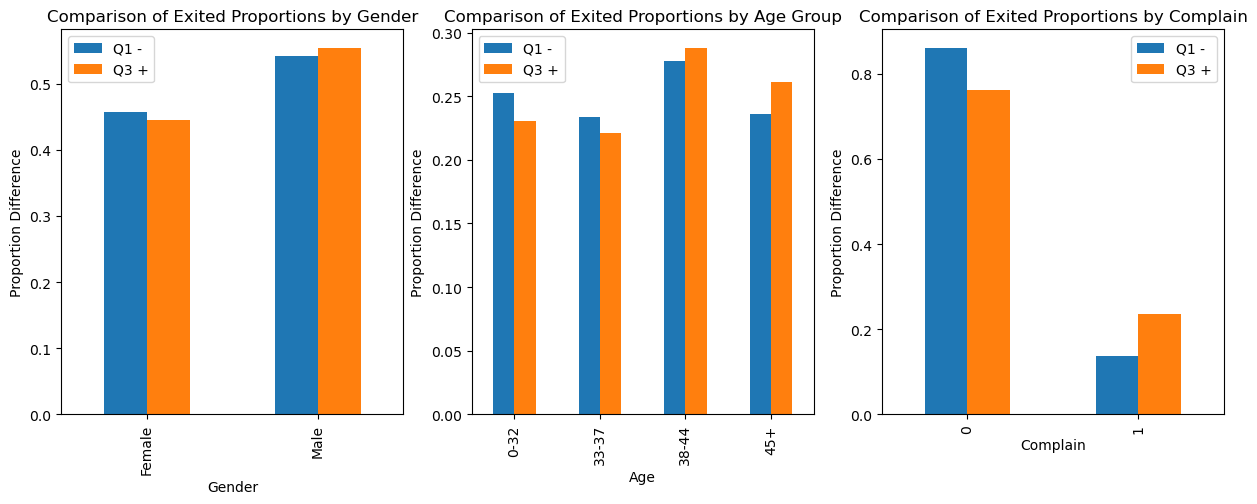

In [94]:
# Create frame with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graph for Gender
compare_gender = Balance_by_Gender_q1.compare(Balance_by_Gender_q3)
compare_gender.columns = ['Q1 -', 'Q3 +']
compare_gender.plot(kind='bar', ax=axes[0])
axes[0].set_title('Comparison of Exited Proportions by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion Difference')

# Graph for Age
compare_age = Balance_by_Age_q1.compare(Balance_by_Age_q3)
compare_age.columns = ['Q1 -', 'Q3 +']
compare_age.plot(kind='bar', ax=axes[1])
axes[1].set_title('Comparison of Exited Proportions by Age Group')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Proportion Difference')

# Graph for Complain
compare_complain = Balance_by_Complain_q1.compare(Balance_by_Complain_q3)
compare_complain.columns = ['Q1 -', 'Q3 +']
compare_complain.plot(kind='bar', ax=axes[2])
axes[2].set_title('Comparison of Exited Proportions by Complain')
axes[2].set_xlabel('Complain')
axes[2].set_ylabel('Proportion Difference')

plt.show()

In [100]:
# For the ML model, let's use two variables considering the previous analysis

# Age45+ (0,1)

bins=[0,44,100]
labels=[0,1]

# Age groups (instead of Age, base in the quarters intervals)
df['age_group45']=pd.cut(df['Age'],bins=bins, labels=labels, right=False)

# Germany (0,1)
df['Is_Germany'] = df['Geography'] == 'Germany'

In [105]:
df.tail(100)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9900       9901    15645896     Duncan          646   Germany    Male   39   
9901       9902    15802909         Hu          706   Germany  Female   56   
9902       9903    15797665   Docherty          730    France  Female   27   
9903       9904    15778959    Brookes          606    France  Female   36   
9904       9905    15722532     Angelo          690     Spain  Female   36   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  ...  EstimatedSalary  Exited  \
9900       6  121681.91              2  ...         61793.47   False   
9901       3  139603.22              1  ...         86383.61   False   
9902       7       0.00              2  ...        144099.48   False   
9903      10       0.00              2  ...        155641.46   False   
9904      10   91760.11              1  ...        135784.94   False   
...      ...        ...            ...  ...              ...     ...   
9995       5       0.00              2  ...         96270.64   False   
9996      10   57369.61              1  ...        101699.77   False   
9997       7       0.00              1  ...         42085.58    True   
9998       3   75075.31              2  ...         92888.52    True   
9999       4  130142.79              1  ...         38190.78   False   

      Complain  Satisfaction Score  Card Type  Point Earned age_group  \
9900     False                   1       GOLD           321     38-44   
9901     False                   4     SILVER           560       45+   
9902     False                   1     SILVER           833      0-32   
9903     False                   2     SILVER           813     33-37   
9904     False                   2   PLATINUM           443     33-37   
...        ...                 ...        ...           ...       ...   
9995     False                   1    DIAMOND           300     38-44   
9996     False                   5   PLATINUM           771     33-37   
9997      True                   3     SILVER           564     33-37   
9998      True                   2       GOLD           339     38-44   
9999     False                   3    DIAMOND           911      0-32   

      Balance_outlier age_group45  Is_Germany  
9900            False           0        True  
9901            False           1        True  
9902            False           0       False  
9903            False           0       False  
9904            False           0       False  
...               ...         ...         ...  
9995            False           0       False  
9996            False           0       False  
9997            False           0       False  
9998            False           0        True  
9999            False           0       False  

[100 rows x 22 columns]

In [16]:
# how many by card type?
df_card = df.pivot_table (index=['Card Type'],aggfunc='size')

In [17]:
# let's see the dataset
df_card

Card Type
DIAMOND     2507
GOLD        2502
PLATINUM    2495
SILVER      2496
dtype: int64

In [18]:
# how many by Geography?
df_geography = df.pivot_table (index=['Geography'],aggfunc='size')

In [19]:
# let's see the dataset
df_geography

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

In [106]:
# Convert age_group45, HasCrCard, IsActiveMember, Exited and Complain to boolean
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['IsActiveMember'] = df['IsActiveMember'].astype(bool)
df['Exited'] = df['Exited'].astype(bool)
df['Complain'] = df['Complain'].astype(bool)
df['age_group45'] = df['Complain'].astype(bool)

In [129]:
# Train / Tests. 
X = df.drop(columns=['Exited','Surname','Age','CustomerId', 'age_group','Geography', 'RowNumber'])
y = df['Exited']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
# Using OneHotEncoder
#ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")

#X_train = ohe.fit_transform(X_train)
#X_test = ohe.transform(X_test)


In [245]:
# Normalization of numeric variables
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
#X_val_scaled = scaler.transform(X_val.select_dtypes(include=['float64', 'int64']))
#X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

In [220]:
#Hyperparameter tuning approach - based on https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7. 
#I tried with Grid Seach, but the "cost" is too much for my laptop

model = RandomForestClassifier()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400],
              'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'bootstrap': [True, False]}

random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)
#Training and prediction

random_rf.fit(X_train,y_train)
preds=random_rf.best_estimator_.predict(X_test)


In [81]:
# Get best parameters from RandomizedSearchCV - Não correr, demora muito tempo!
#best_params = random_rf.best_params_
#print("Melhores parâmetros encontrados pelo RandomizedSearchCV:", best_params)

Melhores parâmetros encontrados pelo RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 800, 'bootstrap': True}


In [130]:
# Train using Random Forest with some hyperparameters 
model = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=800, 
)
model.fit(X_train.select_dtypes(include=['float64', 'int64']), y_train)

RandomForestClassifier(max_depth=800)

In [131]:
# Measure the accuracy of the RandomForests model, with tunning of hyperparameters
accuracy_score(y_pred = model.predict(X_test.select_dtypes(include=['float64', 'int64'])), y_true = y_test)

0.8213333333333334

### With a value of 0.821 seems good, but not nice if we are using unbalanced categories. So, let's try to balance the model.

In [132]:
# Now let's try to balance the model in a different way
model2 = RandomForestClassifier(class_weight='balanced',random_state=42)
model2.fit(X_train.select_dtypes(include=['float64', 'int64']), y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [133]:
# Measure the accuracy of the RandomForests model, with balanced weights
accuracy_score(y_pred = model2.predict(X_test.select_dtypes(include=['float64', 'int64'])), y_true = y_test)

0.824

In [134]:
# Get feature importances
importances = model2.feature_importances_

In [135]:
importances

array([0.17347454, 0.08432253, 0.16489989, 0.16672294, 0.17766401,
       0.05491992, 0.17799616])

In [136]:
X_train_filtered = X_train.select_dtypes(include=['float64', 'int64'])

In [137]:
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_train_filtered.columns, 'Importance': importances})

In [138]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

              Feature  Importance
6        Point Earned    0.177996
4     EstimatedSalary    0.177664
0         CreditScore    0.173475
3       NumOfProducts    0.166723
2             Balance    0.164900
1              Tenure    0.084323
5  Satisfaction Score    0.054920


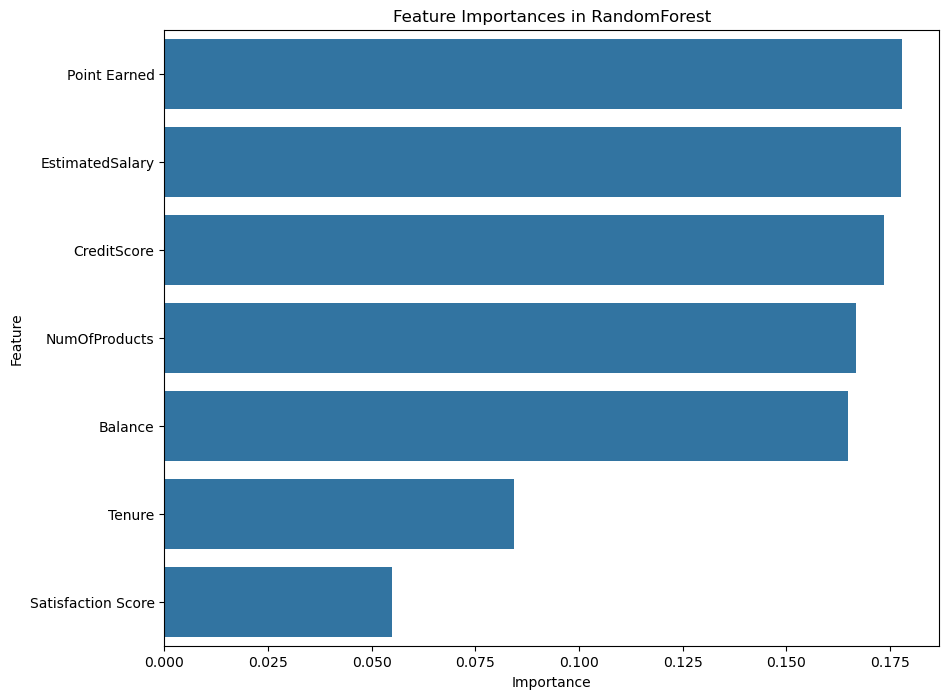

In [139]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in RandomForest')
plt.show()

In [141]:
# Double-checking outliers in the top3 variables

#Point Earned
q1, q3 = np.percentile(df['Point Earned'], [25, 75])
iqr = q3 - q1
print("IQR of point earned is",iqr)

lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print("Dataset without outliers is between",lb,"and", ub)
df['Point_outlier'] = (df['Point Earned'] < lb) | (df['Point Earned'] > ub)

#How many outliers we have in dataframe?
Point_outlier_true = (df["Point Earned"]==True).sum()
print ("Number of outliers is", Point_outlier_true)

IQR of point earned is 391.0
Dataset without outliers is between -176.5 and 1387.5
Number of outliers is 0


In [142]:
# Double-checking outliers in the top3 variables

#EstimatedSalary
q1, q3 = np.percentile(df['EstimatedSalary'], [25, 75])
iqr = q3 - q1
print("IQR of EstimatedSalaryis",iqr)

lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print("Dataset without outliers is between",lb,"and", ub)
df['EstimatedSalary_outlier'] = (df['EstimatedSalary'] < lb) | (df['EstimatedSalary'] > ub)

#How many outliers we have in dataframe?
EstimatedSalary_outlier_true = (df["EstimatedSalary"]==True).sum()
print ("Number of outliers is", EstimatedSalary_outlier_true)

IQR of EstimatedSalaryis 98386.1375
Dataset without outliers is between -96577.09624999999 and 296967.45375
Number of outliers is 0


In [143]:
# Double-checking outliers in the top3 variables

#CreditScore
q1, q3 = np.percentile(df['CreditScore'], [25, 75])
iqr = q3 - q1
print("IQR of CreditScore",iqr)

lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print("Dataset without outliers is between",lb,"and", ub)
df['CreditScore_outlier'] = (df['CreditScore'] < lb) | (df['CreditScore'] > ub)

#How many outliers we have in dataframe?
CreditScore_outlier_true = (df["CreditScore"]==True).sum()
print ("Number of outliers is", CreditScore_outlier_true)

IQR of CreditScore 134.0
Dataset without outliers is between 383.0 and 919.0
Number of outliers is 0


### As três variáveis que mais contribuem para a saida dos clientes são Point Earned, EstimatedSalary e CreditScore